# How does the average rating differ between fictional and non fictional books?

I plan to conduct an observational study using a census of all data collected by scraping Amazon’s best seller lists in October 2020. This study will be a retrospective analysis study.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("books.csv")
df_f = df[df["Genre"] == "Fiction"]
df_nf = df[df["Genre"] == "Non Fiction"]

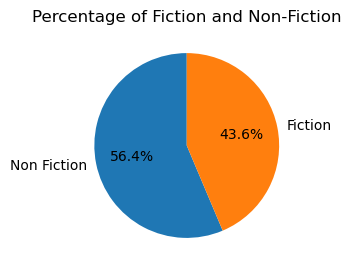

In [24]:
counts = df["Genre"].value_counts()

labels = counts.index
sizes = counts.values
q=3

plt.figure(figsize=(q, q))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Percentage of Fiction and Non-Fiction")
plt.show()

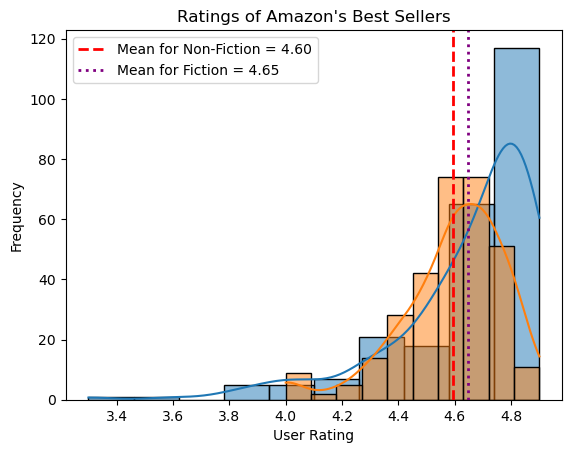

In [14]:
sns.histplot(df_f["User Rating"], bins=10, kde=True)
sns.histplot(df_nf["User Rating"], bins=10, kde=True)


# Mean and std
mean_valf = df_f["User Rating"].mean()
mean_valnf = df_nf["User Rating"].mean()

# Add lines
plt.axvline(mean_valnf, color='red', linestyle='--', linewidth=2, label=f"Mean for Non-Fiction = {mean_valnf:.2f}")
plt.axvline(mean_valf, color='purple', linestyle=':', linewidth=2, label=f"Mean for Fiction = {mean_valf:.2f}")

plt.xlabel("User Rating")
plt.ylabel("Frequency")
plt.title("Ratings of Amazon's Best Sellers")
plt.legend()
plt.show()

In [25]:
std_valf = df_f["User Rating"].std()
print("Standard Deviation of User Rating for Fiction:", std_valf)
df_f["User Rating"].describe()

Standard Deviation of User Rating for Fiction: 0.2651227972638524


count    240.000000
mean       4.648333
std        0.265123
min        3.300000
25%        4.600000
50%        4.700000
75%        4.800000
max        4.900000
Name: User Rating, dtype: float64

In [26]:
std_valnf = df_nf["User Rating"].std()
print("Standard Deviation of User Rating for Non-Fiction:", std_valnf)
df_nf["User Rating"].describe()

Standard Deviation of User Rating for Non-Fiction: 0.18955527867802857


count    310.000000
mean       4.595161
std        0.189555
min        4.000000
25%        4.500000
50%        4.600000
75%        4.700000
max        4.900000
Name: User Rating, dtype: float64

<Axes: xlabel='Genre', ylabel='User Rating'>

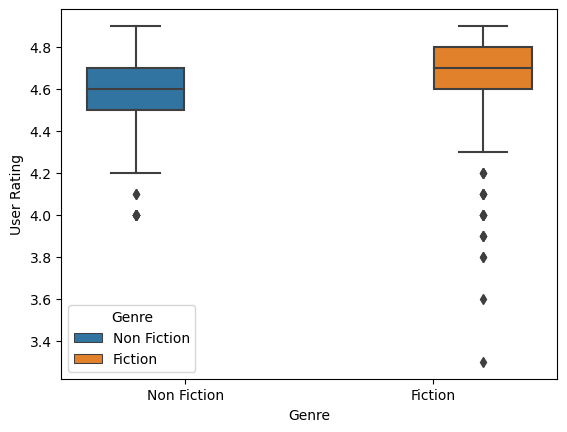

In [27]:
sns.boxplot(data=df, x='Genre', y='User Rating', hue="Genre")

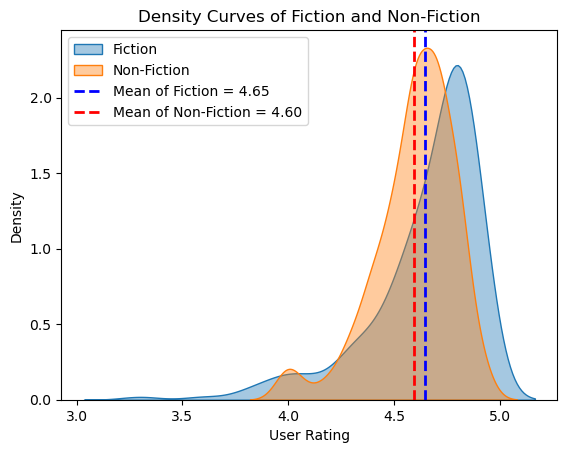

In [28]:
# KDE plot for both datasets
sns.kdeplot(df_f["User Rating"], label="Fiction", fill=True, alpha=0.4)
sns.kdeplot(df_nf["User Rating"], label="Non-Fiction", fill=True, alpha=0.4)

# Calculate stats
mean1 = df_f["User Rating"].mean()
mean2 = df_nf["User Rating"].mean()

# Add mean & median lines
plt.axvline(mean1, color="blue", linestyle="--", linewidth=2, label=f"Mean of Fiction = {mean1:.2f}")

plt.axvline(mean2, color="red", linestyle="--", linewidth=2, label=f"Mean of Non-Fiction = {mean2:.2f}")

plt.xlabel("User Rating")
plt.ylabel("Density")
plt.title("Density Curves of Fiction and Non-Fiction")
plt.legend()
plt.show()

In [29]:
percentiles1 = df_f["User Rating"].quantile([0.25, 0.5, 0.75])
percentiles9 = df_nf["User Rating"].quantile([0.25, 0.5, 0.75])

print("Fictional percentiles:\n", percentiles1)
print("\nNon-Fictional percentiles:\n", percentiles9)

Fictional percentiles:
 0.25    4.6
0.50    4.7
0.75    4.8
Name: User Rating, dtype: float64

Non-Fictional percentiles:
 0.25    4.5
0.50    4.6
0.75    4.7
Name: User Rating, dtype: float64


# Conclusion:
In conclusion, the user rating of Fiction is higher on average than those of Non-Fiction, with the mean rating of fiction being 4.648333, and the mean rating of non-fiction being 4.595161. There are also many more outliers in fiction that have low ratings, but the majority of data on both shows that the ratings are, on average, higher than 4.0, with the 25th percentile of fiction being 4.6 and the 25th percentile for non-fiction being 4.5